In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

sns.set(style='darkgrid')
%matplotlib inline

In [2]:
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Let's define the variables we will use. 

In [3]:
cls_1 = ['Location', 'MinTemp', 'MaxTemp', 'WindGustDir', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
      'Pressure9am', 'Pressure3pm']
df = data[cls_1]
df.head()

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm
0,Albury,13.4,22.9,W,44.0,20.0,24.0,1007.7,1007.1
1,Albury,7.4,25.1,WNW,44.0,4.0,22.0,1010.6,1007.8
2,Albury,12.9,25.7,WSW,46.0,19.0,26.0,1007.6,1008.7
3,Albury,9.2,28.0,NE,24.0,11.0,9.0,1017.6,1012.8
4,Albury,17.5,32.3,W,41.0,7.0,20.0,1010.8,1006.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   WindGustDir    135134 non-null  object 
 4   WindGustSpeed  135197 non-null  float64
 5   WindSpeed9am   143693 non-null  float64
 6   WindSpeed3pm   142398 non-null  float64
 7   Pressure9am    130395 non-null  float64
 8   Pressure3pm    130432 non-null  float64
dtypes: float64(7), object(2)
memory usage: 10.0+ MB


#Our dataset consists of 145460 rows of data. Two of them are objects and the others contain numeric data. 

In [5]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [6]:
len(df['Location'].unique())

49

#There are 49 different types of Location in the dataset. 

In [7]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [8]:
len(df['WindGustDir'].unique())

17

#There are 17 different types of WindGustDir in the dataset. 

In [9]:
df.isnull().values.any()  

True

In [10]:
df.shape

(145460, 9)

In [11]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
WindGustDir      10326
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Pressure9am      15065
Pressure3pm      15028
dtype: int64

In [12]:
df.dropna(inplace = True)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,123816.0,12.426824,6.380143,-8.2,7.8,12.20,17.1,33.9
MaxTemp,123816.0,23.527480,7.020568,2.6,18.1,22.95,28.6,48.1
WindGustSpeed,123816.0,40.130759,13.482715,6.0,31.0,39.00,48.0,135.0
WindSpeed9am,123816.0,14.378529,8.799985,0.0,7.0,13.00,20.0,87.0
WindSpeed3pm,123816.0,19.068876,8.665228,0.0,13.0,19.00,24.0,87.0
Pressure9am,123816.0,1017.632822,7.099795,980.5,1012.9,1017.60,1022.4,1041.0
Pressure3pm,123816.0,1015.224429,7.029468,977.1,1010.4,1015.20,1020.0,1039.6


#When we look at the table, we can see that mean values and 50% values are close to each other. Therefore, it can be interpreted that the data show a normal distribution. 

In [14]:
df.duplicated().value_counts()

False    123816
dtype: int64

In [15]:
df = df.drop_duplicates()

In [16]:
def summary(df, pred = None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cls_1 = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort = True)

    str.columns = cls_1
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    display(str.sort_values(by = 'Nulls', ascending = False))

summary(df)

Data shape: (123816, 9)
___________________________
Data Types:
float64    7
object     2
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Location,object,123816,44,0,Adelaide,Woomera
MaxTemp,float64,123816,413,0,2.6,48.1
MinTemp,float64,123816,381,0,-8.2,33.9
Pressure3pm,float64,123816,543,0,977.1,1039.6
Pressure9am,float64,123816,545,0,980.5,1041
WindGustDir,object,123816,16,0,E,WSW
WindGustSpeed,float64,123816,67,0,6,135
WindSpeed3pm,float64,123816,42,0,0,87
WindSpeed9am,float64,123816,40,0,0,87


In [17]:
df.corr()

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm
MinTemp,1.000000,0.733374,0.195034,0.199547,0.169895,-0.455573,-0.467409
MaxTemp,0.733374,1.000000,0.087845,0.030731,0.039450,-0.333391,-0.428504
WindGustSpeed,0.195034,0.087845,1.000000,0.601501,0.687760,-0.458690,-0.414080
WindSpeed9am,0.199547,0.030731,0.601501,1.000000,0.512784,-0.231006,-0.180132
WindSpeed3pm,0.169895,0.039450,0.687760,0.512784,1.000000,-0.299126,-0.259028
Pressure9am,-0.455573,-0.333391,-0.458690,-0.231006,-0.299126,1.000000,0.961554
Pressure3pm,-0.467409,-0.428504,-0.414080,-0.180132,-0.259028,0.961554,1.000000


<AxesSubplot:>

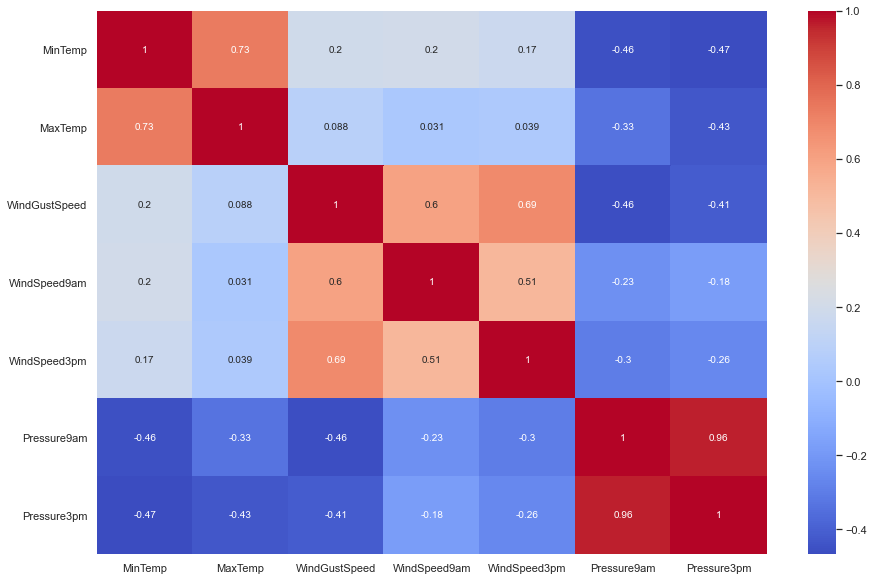

In [18]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True, cmap = "coolwarm")

<AxesSubplot:>

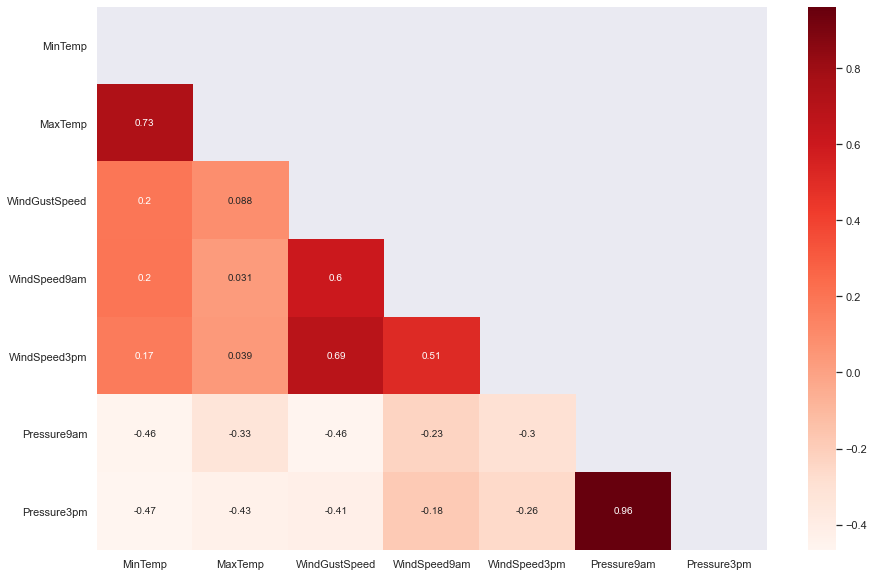

In [19]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, mask = mask, cmap = 'Reds')

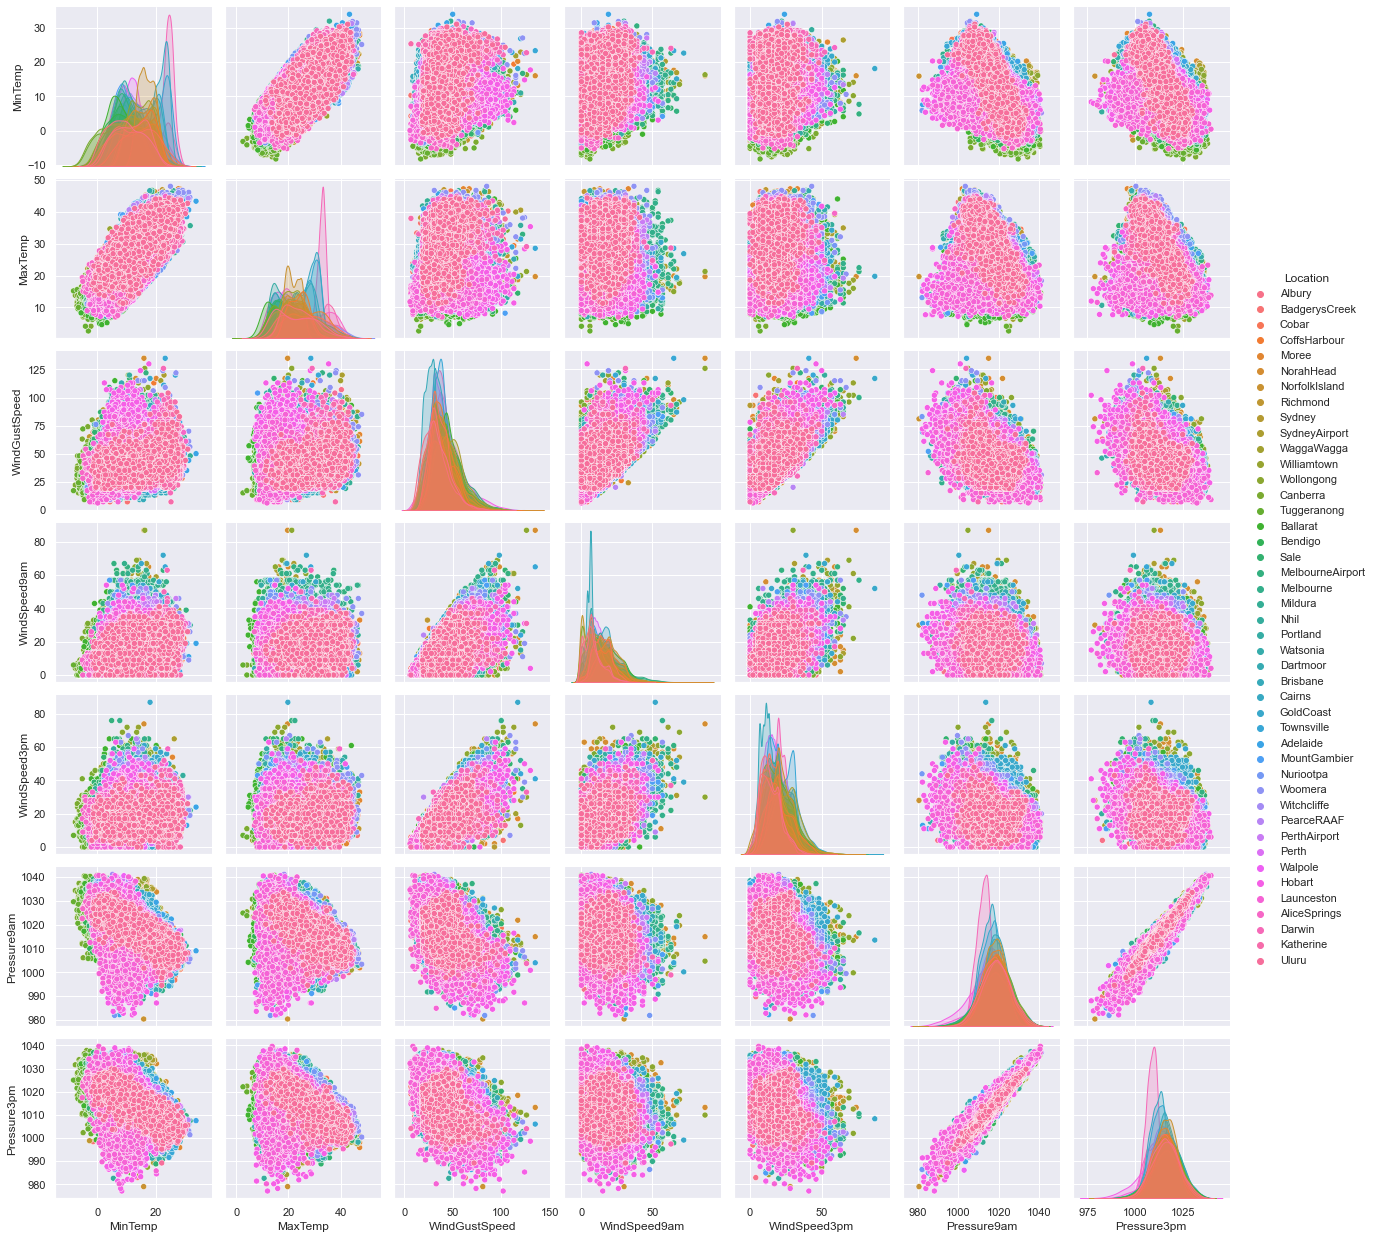

In [20]:
g = sns.pairplot(df, kind = 'scatter', hue = 'Location')

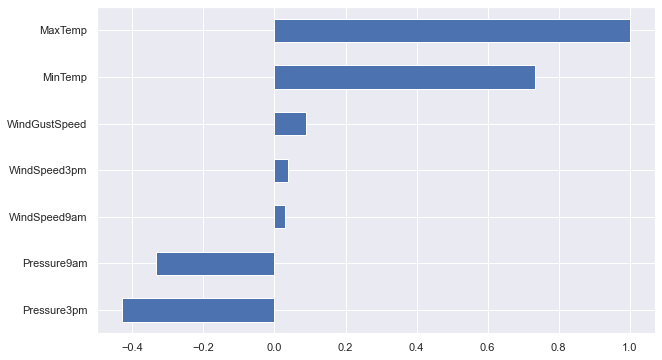

In [21]:
plt.figure(figsize=(10,6))
df.corr()["MaxTemp"].sort_values().plot.barh();

In [22]:
df_notdummy = df.copy()
df = pd.get_dummies(df)
df.head()

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Location_Adelaide,Location_Albury,Location_AliceSprings,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,13.4,22.9,44.0,20.0,24.0,1007.7,1007.1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,44.0,4.0,22.0,1010.6,1007.8,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,46.0,19.0,26.0,1007.6,1008.7,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,24.0,11.0,9.0,1017.6,1012.8,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,41.0,7.0,20.0,1010.8,1006.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
df_notdummy.head()

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm
0,Albury,13.4,22.9,W,44.0,20.0,24.0,1007.7,1007.1
1,Albury,7.4,25.1,WNW,44.0,4.0,22.0,1010.6,1007.8
2,Albury,12.9,25.7,WSW,46.0,19.0,26.0,1007.6,1008.7
3,Albury,9.2,28.0,NE,24.0,11.0,9.0,1017.6,1012.8
4,Albury,17.5,32.3,W,41.0,7.0,20.0,1010.8,1006.0


In [24]:
X = df.iloc[:,:7]
X

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm
0,13.4,22.9,44.0,20.0,24.0,1007.7,1007.1
1,7.4,25.1,44.0,4.0,22.0,1010.6,1007.8
2,12.9,25.7,46.0,19.0,26.0,1007.6,1008.7
3,9.2,28.0,24.0,11.0,9.0,1017.6,1012.8
4,17.5,32.3,41.0,7.0,20.0,1010.8,1006.0
...,...,...,...,...,...,...,...
145454,3.5,21.8,31.0,15.0,13.0,1024.7,1021.2
145455,2.8,23.4,31.0,13.0,11.0,1024.6,1020.3
145456,3.6,25.3,22.0,13.0,9.0,1023.5,1019.1
145457,5.4,26.9,37.0,9.0,9.0,1021.0,1016.8


In [25]:
y = df_notdummy['Location']
y

0         Albury
1         Albury
2         Albury
3         Albury
4         Albury
           ...  
145454     Uluru
145455     Uluru
145456     Uluru
145457     Uluru
145458     Uluru
Name: Location, Length: 123816, dtype: object

# Let's divide our data set into Train and Test. 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50 )

In [28]:
print (' Test ve Train veri setlerindeki gözlem sayıları...')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

 Test ve Train veri setlerindeki gözlem sayıları...
X_train:  (99052, 7)
y_train:  (99052,)
X_test:  (24764, 7)
y_test:  (24764,)


# First, we will build our model with Statsmodel, to see detailed statistical results. 

In [29]:
X = df.drop(["MaxTemp"], axis = 1)
y = df["MaxTemp"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [30]:
lm = sm.OLS(y_train,X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MaxTemp   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     3641.
Date:                Fri, 02 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:00:43   Log-Likelihood:            -2.5448e+05
No. Observations:               92862   AIC:                         5.091e+05
Df Residuals:                   92797   BIC:                         5.097e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
MinTemp                       0.8628      0.003    297.886      0.000       0.857       0.869
WindGustSpeed                 0.0192      0.002     12.544      0.000       0.016       0.022
WindSpeed9am                 -0.0678      0.002    -35.010      0.000      -0.072      -0.064
WindSpeed3pm               6.305e-05      0.002      0.030      0.976      -0.004       0.004
Pressure9am                   0.9237      0.008    121.939      0.000       0.909       0.939
Pressure3pm                  -0.9691      0.008   -128.650      0.000      -0.984      -0.954
Location_Adelaide            14.6649      0.664     22.082      0.000      13.363      15.966
Location_Albury              16.3499      0.657     24.888      0.000      15.062      17.638
Location_AliceSprings        18.6295      0.656     28.418      0.000      17.345      19.914
Location_BadgerysCreek       15.9598      0.658     24.242      0.000      14.669      17.250
Location_Ballarat            15.3646      0.657     23.388      0.000      14.077      16.652
Location_Bendigo             16.6677      0.657     25.382      0.000      15.381      17.955
Location_Brisbane            13.4640      0.661     20.376      0.000      12.169      14.759
Location_Cairns              12.7640      0.659     19.356      0.000      11.472      14.056
Location_Canberra            16.7177      0.658     25.421      0.000      15.429      18.007
Location_Cobar               16.6687      0.661     25.231      0.000      15.374      17.964
Location_CoffsHarbour        13.9518      0.665     20.995      0.000      12.649      15.254
Location_Dartmoor            15.2136      0.658     23.123      0.000      13.924      16.503
Location_Darwin              13.3982      0.661     20.268      0.000      12.103      14.694
Location_GoldCoast           13.0657      0.667     19.591      0.000      11.758      14.373
Location_Hobart              13.0429      0.655     19.927      0.000      11.760      14.326
Location_Katherine           17.1485      0.661     25.940      0.000      15.853      18.444
Location_Launceston          14.6161      0.655     22.319      0.000      13.333      15.900
Location_Melbourne           13.7974      0.664     20.794      0.000      12.497      15.098
Location_MelbourneAirport    15.1696      0.662     22.917      0.000      13.872      16.467
Location_Mildura             17.9307      0.660     27.164      0.000      16.637      19.224
Location_Moree               17.4840      0.661     26.435      0.000      16.188      18.780
Location_MountGambier        15.6064      0.659     23.673      0.000      14.314      16.899
Location_Nhil                17.3229      0.665     26.069      0.000      16.021      18.625
Location_NorahHead           11.8345      0.666     17.757      0.000      

In [31]:
df

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Location_Adelaide,Location_Albury,Location_AliceSprings,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,13.4,22.9,44.0,20.0,24.0,1007.7,1007.1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,44.0,4.0,22.0,1010.6,1007.8,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,46.0,19.0,26.0,1007.6,1008.7,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,24.0,11.0,9.0,1017.6,1012.8,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,41.0,7.0,20.0,1010.8,1006.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,31.0,15.0,13.0,1024.7,1021.2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145455,2.8,23.4,31.0,13.0,11.0,1024.6,1020.3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145456,3.6,25.3,22.0,13.0,9.0,1023.5,1019.1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
145457,5.4,26.9,37.0,9.0,9.0,1021.0,1016.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X_train

,MinTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Location_Adelaide,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
73385,3.0,43.0,11.0,17.0,1033.7,1031.5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
58773,4.6,65.0,13.0,28.0,1011.9,1005.9,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
117057,16.2,54.0,31.0,15.0,1014.8,1009.3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114646,16.1,43.0,20.0,9.0,1007.8,1003.6,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
61704,5.5,26.0,13.0,17.0,1026.6,1024.5,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141312,23.2,33.0,11.0,22.0,1012.3,1008.9,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
120685,2.5,28.0,15.0,7.0,1032.5,1029.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
883,2.9,15.0,7.0,9.0,1027.8,1023.4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19755,14.9,57.0,30.0,17.0,1003.8,1005.5,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# ML Modelling

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures

In [34]:
X = df.drop(["MaxTemp"], axis = 1)
y = df["MaxTemp"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [35]:
'''
* R-squared value --> Shows how well our model predicted.
* If the R-squared value is low, the model is unsuccessful, if it is high, the model is evaluated by looking at other metrics.
* Adj. R-squared --> Adjusted R-squared value
* Probe(F-statistic)--> Indicates whether our model is meaningful. This value must be less than 0.05.
* The values we found from RMSE are real values. Therefore, it can be said that the most important metric is RMSE.

'''

def eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, model):
    cv_score = cross_val_score(estimator = model, X = X_test, y = y_test, cv = 10).mean()
    cv_RMSEs = cross_val_score(estimator = model, X = X_test, y = y_test, scoring = "neg_mean_squared_error", cv = 10)
    cv_rmse = np.sqrt(-cv_RMSEs.mean())
    
    rmse = [np.sqrt(mean_squared_error(y_test, y_pred)), np.sqrt(mean_squared_error(y_train, y_pred_train)), cv_rmse]
    mae = [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_train, y_pred_train)]
    mse = [mean_squared_error(y_test, y_pred) , mean_squared_error(y_train, y_pred_train) ]
    score = [r2_score(y_test, y_pred), r2_score(y_train, y_pred_train), cv_score]
    dic = {'R2_Score':score, 
#      'MAE':mae, 
#      'MSE':mse, 
     'RMSE':rmse} 
#     return pd.Series(dic).to_frame().rename(columns={0:"Test", 1:'Train'})
    return pd.DataFrame(dic).T.rename(columns={0:"Test", 1:'Train', 2:'Cross_Val'})

# 1- Linear Regression

In [36]:
lr = LinearRegression(normalize = True)
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [37]:
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [38]:
lin_reg = eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, lr)
lin_reg

,Test,Train,Cross_Val
R2_Score,0.713669,0.715165,0.713050
RMSE,3.749969,3.749087,3.753057


#We can say that the closer the train and test results are to each other, the more successful it is.
#By the way we can say there is no overfitting.

# 2- Ridge Regression

#If there is data in our dataset that has no effect but we think is actually effective, then we use Ridge Regression.

In [39]:
ridge_model = Ridge(normalize = True)
ridge_model.fit(X_train, y_train)

Ridge(normalize=True)

In [40]:
y_pred = ridge_model.predict(X_test)
y_pred_train = ridge_model.predict(X_train)

In [41]:
eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, ridge_model)

,Test,Train,Cross_Val
R2_Score,0.529027,0.531975,0.527904
RMSE,4.809407,4.805773,4.814696


#Ridge Regression applies a penalty value. If we do not enter a penalty value, alpha = 1.0 is automatically taken.

#We can set the alpha value. As the alpha value increases, we reduce the effect of the independent variables on the model.

#In cases of multicollinearity and overfitting, we can adjust the alpha value using Ridge Regression.

In [42]:
alpha_space = np.linspace(0.01, 5, 50)

In [43]:
ridge_model = Ridge(0.001, normalize=True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
y_pred_train = ridge_model.predict(X_train)

ridge = eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, ridge_model)
ridge

,Test,Train,Cross_Val
R2_Score,0.713515,0.715112,0.713050
RMSE,3.750976,3.749434,3.753082


# 3- Lasso Regression

#It subtracts the independent variable by making the coefficient of the independent variable zero.

#The difference from Ridge Regression is that while we cannot make the coefficient of the independent variable zero in Ridge Regression, we can make it zero in Lasso Regression.

In [44]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [45]:
y_pred=lasso_model.predict(X_test)
y_pred_train=lasso_model.predict(X_train)

In [46]:
eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, lasso_model)

,Test,Train,Cross_Val
R2_Score,0.619194,0.621682,0.621132
RMSE,4.324596,4.320736,4.312850


In [47]:
alpha_space = np.linspace(0.01, 20, 50)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5).fit(X_train, y_train)
# When you say normalize = True, there is no need also additional scaling.

# Ridge Regression runs slow, Lasso Regression runs fast.

In [48]:
lasso_cv_model.alpha_

0.01

In [49]:
# As the alpha value increases, we reduce the effect of the independent variables on the model. 
# If we enlarge Alpha manually, it reduces the number of features. But we have to waive the R squared score.
lasso_model = Lasso(0.01).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
y_pred_train = lasso_model.predict(X_train)

In [50]:
lasso = eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, lasso_model)
lasso

,Test,Train,Cross_Val
R2_Score,0.709804,0.710963,0.709167
RMSE,3.775190,3.776640,3.778369


# 4- ElasticNet 

In [51]:
elas_model = ElasticNetCV(alphas = alpha_space, l1_ratio = 0.5)
elas_model.fit(X_train,y_train)

ElasticNetCV(alphas=array([1.00000000e-02, 4.17959184e-01, 8.25918367e-01, 1.23387755e+00,
       1.64183673e+00, 2.04979592e+00, 2.45775510e+00, 2.86571429e+00,
       3.27367347e+00, 3.68163265e+00, 4.08959184e+00, 4.49755102e+00,
       4.90551020e+00, 5.31346939e+00, 5.72142857e+00, 6.12938776e+00,
       6.53734694e+00, 6.94530612e+00, 7.35326531e+00, 7.76122449e+00,
       8.16918367e+00, 8.577142...
       9.80102041e+00, 1.02089796e+01, 1.06169388e+01, 1.10248980e+01,
       1.14328571e+01, 1.18408163e+01, 1.22487755e+01, 1.26567347e+01,
       1.30646939e+01, 1.34726531e+01, 1.38806122e+01, 1.42885714e+01,
       1.46965306e+01, 1.51044898e+01, 1.55124490e+01, 1.59204082e+01,
       1.63283673e+01, 1.67363265e+01, 1.71442857e+01, 1.75522449e+01,
       1.79602041e+01, 1.83681633e+01, 1.87761224e+01, 1.91840816e+01,
       1.95920408e+01, 2.00000000e+01]))

In [52]:
elas_model.l1_ratio_

0.5

In [53]:
elas_model.alpha_

0.01

In [54]:
y_pred = elas_model.predict(X_test)
y_pred_train = elas_model.predict(X_train)

In [55]:
elastic = eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, elas_model)
elastic

,Test,Train,Cross_Val
R2_Score,0.707874,0.709179,0.707354
RMSE,3.787722,3.788281,3.790120


# 5- Polynomial Regression

In [56]:
poly = PolynomialFeatures(2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [57]:
pol_model = LinearRegression(normalize = True)
pol_model.fit(X_poly_train,y_train)
y_pred = pol_model.predict(X_poly_test)
y_pred_train = pol_model.predict(X_poly_train)

In [58]:
polinom = eval_metrics(X_test, y_test, y_pred, y_train, y_pred_train, pol_model)
polinom

,Test,Train,Cross_Val
R2_Score,0.769608,0.779040,0.713050
RMSE,3.363776,3.302069,3.753057
